## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [ ]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

W0725 14:25:15.790647 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 14:25:15.822603 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 14:25:15.835901 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0725 14:25:23.531246 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 14:25:23.539787 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0725 14:25:27.764421 4575536576 deprecation.py:323] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 14:25:27.810508 4575536576 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.9177 - acc: 0.3108 - val_loss: 1.7588 - val_acc: 0.3673
Epoch 2/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.6947 - acc: 0.3942 - val_loss: 1.6351 - val_acc: 0.4130
Epoch 3/100
50000/50000 [==============================] - 10s 199us/step - loss: 1.6054 - acc: 0.4278 - val_loss: 1.5443 - val_acc: 0.4468
Epoch 4/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.5442 - acc: 0.4512 - val_loss: 1.5473 - val_acc: 0.4445
Epoch 5/100
50000/50000 [==============================] - 9s 187us/step - loss: 1.4975 - acc: 0.4668 - val_loss: 1.5294 - val_acc: 0.4500
Epoch 6/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.4638 - acc: 0.4773 - val_loss: 1.5351 - val_acc: 0.4462
Epoch 7/100
50000/50000 [==============================] - 7s 150us/step - loss: 1.4214 - acc: 0.4936 - val_loss: 1

50000/50000 [==============================] - 7s 148us/step - loss: 0.5067 - acc: 0.8196 - val_loss: 2.0426 - val_acc: 0.5201
Epoch 60/100
50000/50000 [==============================] - 9s 178us/step - loss: 0.5023 - acc: 0.8209 - val_loss: 2.1176 - val_acc: 0.5137
Epoch 61/100
50000/50000 [==============================] - 11s 213us/step - loss: 0.4860 - acc: 0.8282 - val_loss: 2.0577 - val_acc: 0.5150
Epoch 62/100
50000/50000 [==============================] - 8s 157us/step - loss: 0.4892 - acc: 0.8251 - val_loss: 2.0887 - val_acc: 0.5142
Epoch 63/100
50000/50000 [==============================] - 7s 146us/step - loss: 0.4765 - acc: 0.8303 - val_loss: 2.2533 - val_acc: 0.5062
Epoch 64/100
50000/50000 [==============================] - 8s 158us/step - loss: 0.4509 - acc: 0.8377 - val_loss: 2.1748 - val_acc: 0.5101
Epoch 65/100
50000/50000 [==============================] - 8s 161us/step - loss: 0.4519 - acc: 0.8394 - val_loss: 2.2424 - val_acc: 0.5121
Epoch 66/100
50000/50000 [======

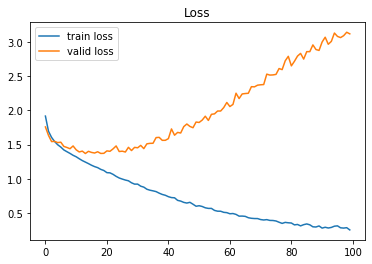

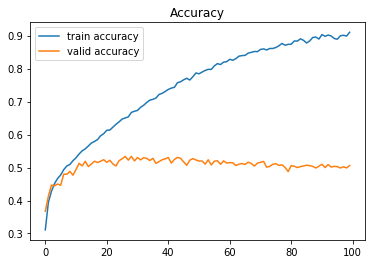

In [11]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

## 參考資料
### 如何 Debugging 1/2
- 檢查程式碼
    - 養成好的程式撰寫習慣 (PEP8)
- 確認參數設定
- 欲實作的模型是否合適當前的資料
- 確認資料結構
- 資料是否足夠
- 是否乾淨
- 是否有適當的前處理
![](https://ai100-fileentity.cupoy.com/2nd/homework/D78/1562834450948/large)

### 如何 Debugging 2/2
- 以簡單的方式實現想法
- 建立評估機制
- 開始循環測試 (evaluate - tuning - debugging)
![](https://ai100-fileentity.cupoy.com/2nd/homework/D78/1562834573759/large)

### 參考連結：

[養成良好 Coding Style: Python Coding Style – PEP8](https://www.python.org/dev/peps/pep-0008/)

[Troubleshooting Deep Neural Network – A Field Guide to Fix your Model](http://josh-tobin.com/assets/pdf/troubleshooting-deep-neural-networks-01-19.pdf)